<a href="https://colab.research.google.com/github/tandat-1305/Data-Analysis-with-Python/blob/main/Medical%20Cost%20-%20Gradient%20Boosting%20Regressor/main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
sns.set()

In [ ]:
import os
data = pd.read_csv('https://raw.githubusercontent.com/tandat-1305/Data-Analysis-with-Python/main/Medical%20Cost%20-%20Gradient%20Boosting%20Regressor/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Xem qua dữ liệu**

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Làm sạch dữ liệu**

In [ ]:
obj_cols = [x for x in data.columns if data[x].dtypes ==
            'object']

num_cols = [x for x in data.columns if data[x].dtypes !=
            'object']

print('obj : {}, len : {} '.format(obj_cols, len(obj_cols)))
print('num : {}, len : {} '.format(num_cols, len(num_cols)))

obj : ['sex', 'smoker', 'region'], len : 3 
num : ['age', 'bmi', 'children', 'charges'], len : 4 


In [ ]:
#Kiểm tra thiếu hụt dữ liệu
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Kiểm tra trùng lặp 
data.duplicated().sum()

1

In [ ]:
#Loại bỏ trùng lặp
data.drop_duplicates(inplace = True)

**Các loại dữ liệu trong cột object**

In [ ]:
for x in obj_cols:
  print('unique {} : {}'.format(x, data[x].unique()))

unique sex : ['female' 'male']
unique smoker : ['yes' 'no']
unique region : ['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
#Chi tiết thống kê cơ bản: phân vị, trung bình, std, v.v.
data.describe(include = 'all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


# **Data Visualization - Trực quan hóa dữ liệu** 

Text(0.5, 1.0, 'Phân bổ các khoản phí')

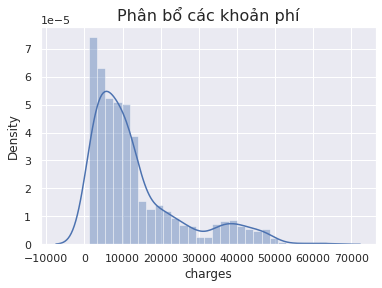

In [ ]:
#Phân bổ các khoản phí
sns.distplot(data['charges'])
plt.title('Phân bổ các khoản phí', size = 16)

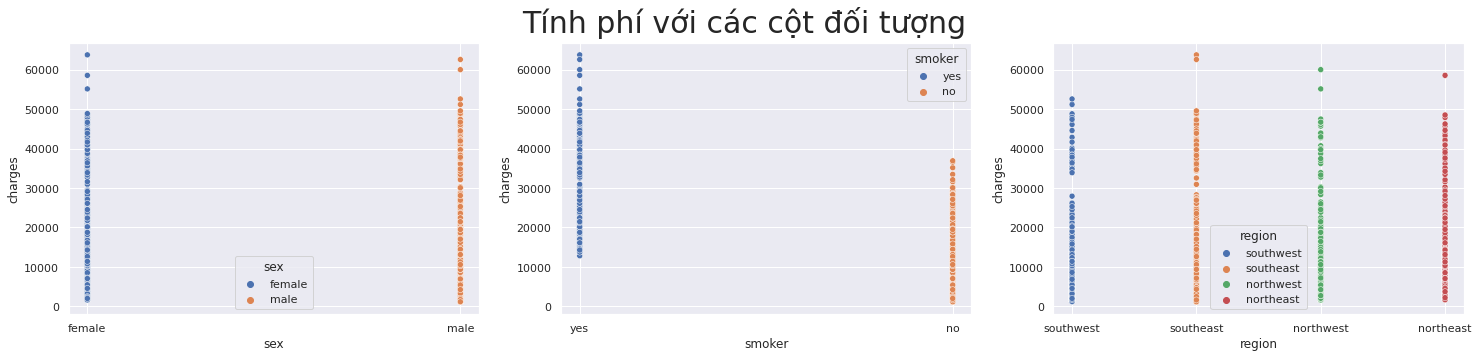

In [ ]:
#Tính phí với các cột đối tượng - Charges with Object columns
fig, axs = plt.subplots(1, 3, figsize = (25,5))
fig.suptitle('Tính phí với các cột đối tượng', size = 30)

for j in range(0,3) :
  axs[j] = sns.scatterplot(data = data, x = obj_cols[j], y = 'charges',
                           #các điểm có màu sắc khác nhau
                           hue = obj_cols[j],
                           #Các trục có sẵn các plot khác nhau  
                           ax = axs[j])
  
  fig.show()

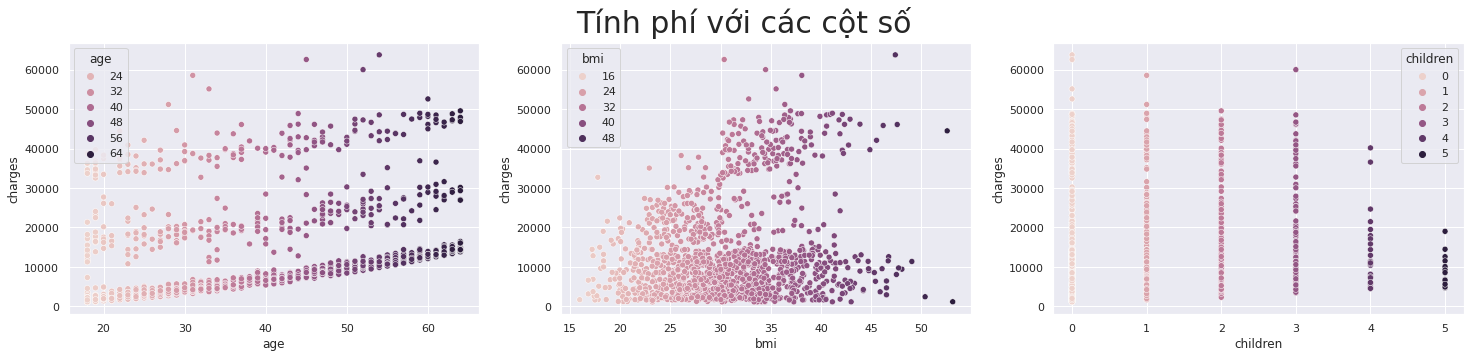

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (25,5))
fig.suptitle('Tính phí với các cột số', size = 30)

for j in range(0,3):
  axs[j] = sns.scatterplot(data = data, x = num_cols[j], y ='charges',
                           hue = num_cols[j],
                           ax = axs[j])
  
  fig.show()

In [ ]:
#Cột phân loại
categorical_cols = obj_cols.copy()
categorical_cols.append('children')
categorical_cols

['sex', 'smoker', 'region', 'children']

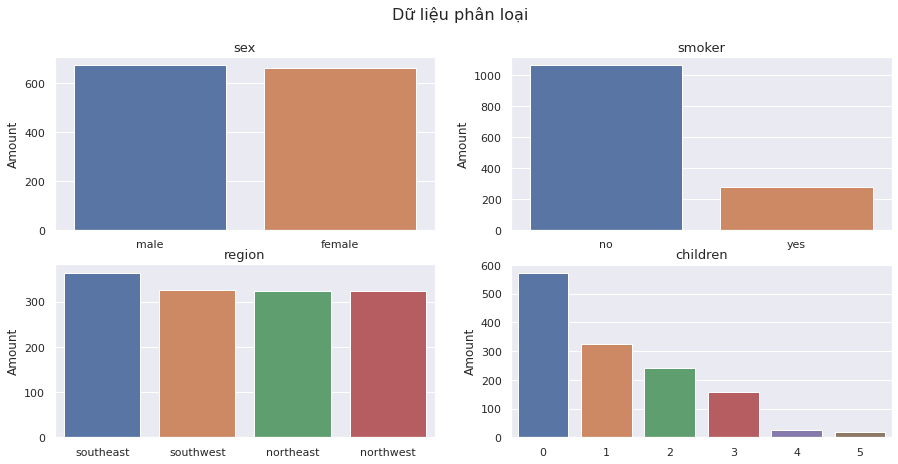

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (15,7))
fig.suptitle('Dữ liệu phân loại', size = 16)

ci = 0
for i in range(0,2):
  for j in range(0,2):
    axs[i,j] = sns.barplot(y = data[categorical_cols[ci]].value_counts(), 
    x = data[categorical_cols[ci]].value_counts().index,
    ax = axs[i,j])
    axs[i,j].set_title(categorical_cols[ci], size = 13)
    axs[i,j].set_ylabel('Amount')
    ci += 1
  fig.show()

Text(0.5, 1.0, 'Tổng phí trẻ em theo khu vực')

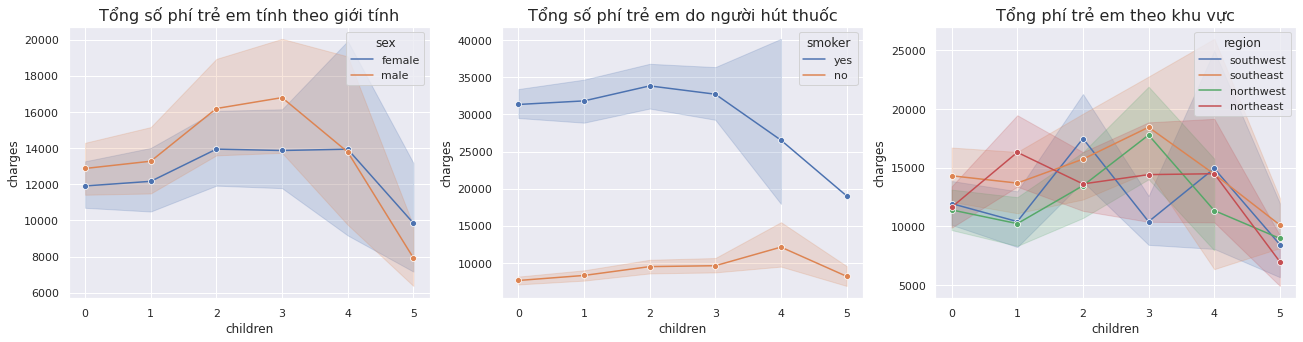

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(22,5))
axs[0] = sns.lineplot(data=data, x='children', y='charges', hue='sex', marker='o', ax=axs[0])
axs[0].set_title('Tổng số phí trẻ em tính theo giới tính', size=16)

axs[1] = sns.lineplot(data=data, x='children', y='charges', hue='smoker', marker='o', ax=axs[1])
axs[1].set_title('Tổng số phí trẻ em do người hút thuốc', size=16)

axs[2] = sns.lineplot(data=data, x='children', y='charges', hue='region', marker='o', ax=axs[2])
axs[2].set_title('Tổng phí trẻ em theo khu vực', size=16)

Tổng số phí trẻ em tính theo giới tính


*   Số lượng trẻ em tăng thì chi phí phát sinh cũng tăng lên, nhưng khi trẻ em lớn hơn 3 tuổi thì chi phí sẽ giảm xuống.
*   Chi phí khám bệnh cho trẻ nam con hơn trẻ nữ, khi trẻ em trên 4 tuổi thì chi phí trẻ nữ con hơn trẻ nam.

Tổng số chi phí trẻ em do người hút thuốc 


*   Chi phí y tế cho người  hút thuốc cao hơn nhiều so với người không hút thuốc.


Tổng phí trẻ em theo khu vực


*   Đông nam bộ chiếm vị trí đầu tiên với chi phí y tế cao nhất (southeast)
*   Chi phí y tế ở Tây Nam Bộ có nhiều biến động (southwest)






Text(0.5, 1.0, 'Region Charges by Smoker')

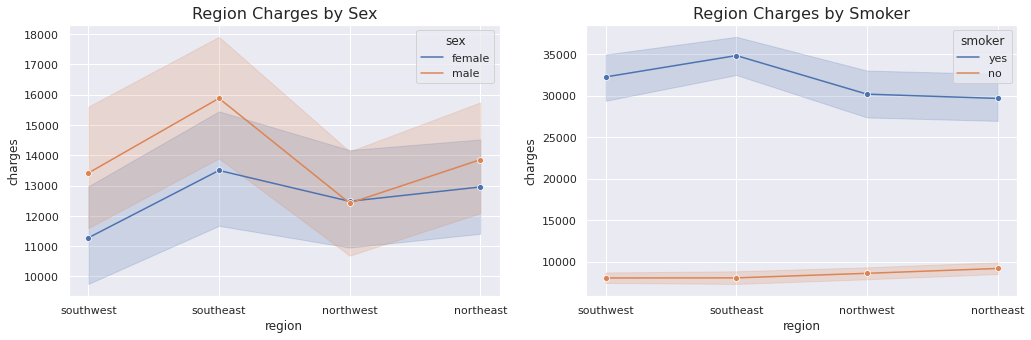

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(17,5))
axs[0] = sns.lineplot(data=data, x='region', y='charges', hue='sex', marker='o', ax=axs[0])
axs[0].set_title('Region Charges by Sex', size=16)

axs[1] = sns.lineplot(data=data, x='region', y='charges', hue='smoker', marker='o', ax=axs[1])
axs[1].set_title('Region Charges by Smoker', size=16)

Chi phí y tế cho nam giới và người hút thuốc cao hơn nhiều ở tất cả các khu vực.


Text(0.5, 1.0, 'Smoker Charges by Sex')

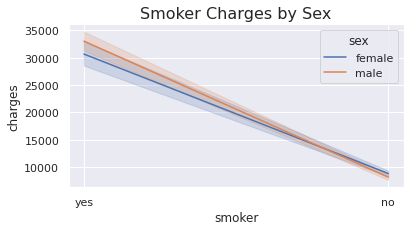

In [ ]:
plt.figure(figsize=(6,3))
sns.lineplot(data=data, x='smoker', y='charges', hue='sex')
plt.title('Smoker Charges by Sex', size=16)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
ss = StandardScaler()

In [ ]:
data_pre = data.copy()
data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#data_pre_dummies = pd.get_dummies(data_pre, drop_first=True)
for x in obj_cols:
    data_pre[x] = le.fit_transform(data_pre[x])

**Mô hình dữ liệu**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
 
GBR = GradientBoostingRegressor()

In [ ]:
inputs = data_pre.drop(['charges'], axis=1)
outputs = data_pre['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=0)

In [ ]:
reg = GBR.fit(x_train, y_train)
reg.score(x_train, y_train).round(2)

0.91

# Kết quả

In [ ]:
#predict
table_pred = pd.DataFrame()
table_pred['actual'] = y_test
table_pred['predict'] = reg.predict(x_test).round(5)
table_pred

,actual,predict
1248,1633.96180,2005.84504
610,8547.69130,10464.64294
393,9290.13950,11145.43429
503,32548.34050,35055.60198
198,9644.25250,10089.31849
...,...,...
809,3309.79260,6597.07902
726,6664.68595,7250.12652
938,2304.00220,4331.05543
474,25382.29700,25660.59531


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
print('mean_squared_error : {}'.format(mean_squared_error(table_pred['actual'], table_pred['predict'])))
print('mean_error : {}'.format(mean_squared_error(table_pred['actual'], table_pred['predict'], squared=False)))
print('mean_absolute_error : {}'.format(mean_absolute_error(table_pred['actual'], table_pred['predict'])))

mean_squared_error : 25549404.34709914
mean_error : 5054.641861408099
mean_absolute_error : 2770.736500559701


In [ ]:
xline = max(max(table_pred['actual']), max(table_pred['predict']))
yline = min(min(table_pred['actual']), min(table_pred['predict']))

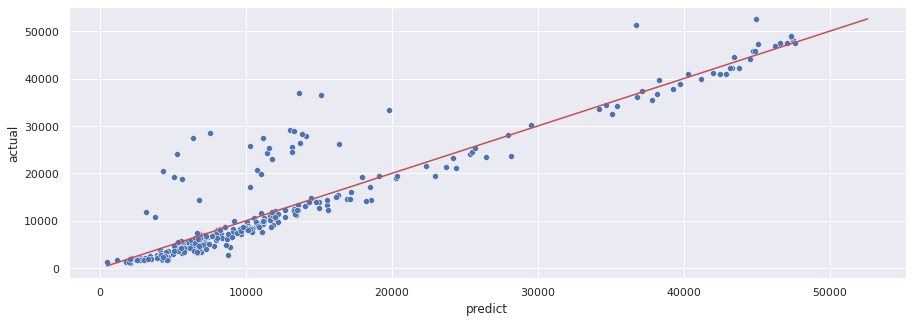

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(table_pred['predict'], table_pred['actual'])
plt.plot([xline, yline], [xline, yline], c='r')

# **Tài liệu tham khảo**

1.   https://seaborn.pydata.org/generated/seaborn.scatterplot.html 
2.   https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8



